# Predefined Trajectory for 2-Link Planar Manipulator
In this notebook, the aim is for our manipulator to follow a pre-defined trajecotry and we are interested in calculating the torque required to achieve the trajectory

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import cumulative_trapezoid


#system parameters
m1, m2= 1, 2
l1, l2= 2, 1
lc1, lc2= 1, 0.5
I1, I2 = 0.33, 0.1667
g=9.81
t=np.linspace(0, 40, 1000)


#desired trajectory
qd=np.array([np.zeros([1,1000])[0],np.sin(t)])
dqddt=np.array([np.zeros([1,1000])[0],np.cos(t)])
kp=np.array([[1,0],[0,1]])
kd=np.array([[0.2,0],[0,1]])

#ode solver
def dSdt(t, S):
    q1,dq1dt,q2,dq2dt=S
    ddq1dt=kd[0][0]*(-dq1dt)+kp[0][0]*(-q1)
    ddq2dt=-np.sin(t)+kd[1][1]*(np.cos(t)-dq2dt)+kp[1][1]*(np.sin(t)-q2)
    return dq1dt, ddq1dt, dq2dt, ddq2dt
               

y0=[0,0,0,0]  #initial conditions
sol=solve_ivp(dSdt,t_span=(0,max(t)),y0=y0,t_eval=t)

#respective solutions
q1=sol.y[0]
q2=sol.y[2]
dq1dt=sol.y[1]
dq2dt=sol.y[3]
ddq1dt=kd[0][0]*(-dq1dt)+kp[0][0]*(-q1)
ddq2dt=-np.sin(t)+kd[1][1]*(np.cos(t)-dq2dt)+kp[1][1]*(np.sin(t)-q2)

#torque Calculations (kinematics)
M=np.array([[(np.array([m2*((l1**2)+(lc2**2))]*1000)+m2*(2*l1*lc2*np.cos(q2))+np.array([m1*(lc1**2)+I1+I2]*1000)), (m2*l1*lc2*np.cos(q2)+np.array([m2*lc2**2+I2]*1000))], [(m2*l1*lc2*np.cos(q2)+np.array([m2*lc2**2+I2]*1000)), np.array([m2*(lc2**2)+I2]*1000)]])
C=np.array([[(-2*m2*l1*lc2*np.sin(q2)*dq2dt), (-m2*l1*lc2*np.sin(q2)*dq2dt)], [(m2*l1*lc2*np.sin(q2)*dq1dt), np.array([0]*1000)]])
G=np.array([[(m1*g*lc1*np.cos(q1))+(m2*g*l1*np.cos(q1))+(m2*g*lc2*np.cos(q1+q2))], [(m2*g*lc2*np.cos(q1+q2))]])

#torque at respective links
tau1=(np.array([m2*((l1**2)+(lc2**2))]*1000)+m2*(2*l1*lc2*np.cos(q2))+np.array([m1*(lc1**2)+I1+I2]*1000))*ddq1dt+(m2*l1*lc2*np.cos(q2)+np.array([m2*lc2**2+I2]*1000))*ddq2dt+(-2*m2*l1*lc2*np.sin(q2)*dq2dt)*dq1dt+(-m2*l1*lc2*np.sin(q2)*dq2dt)*dq2dt+(m1*g*lc1*np.cos(q1))+(m2*g*l1*np.cos(q1))+(m2*g*lc2*np.cos(q1+q2))
tau2=(m2*l1*lc2*np.cos(q2)+np.array([m2*lc2**2+I2]*1000))*ddq1dt+(np.array([m2*(lc2**2)+I2]*1000))*ddq2dt+(m2*l1*lc2*np.sin(q2)*dq1dt)*dq1dt+(m2*g*lc2*np.cos(q1+q2))

### Energy Check

In [3]:
#power
P=tau1*dq1dt+tau2*dq2dt
E=cumulative_trapezoid(P,t,initial=0) #total energy by integrating power

#kinetic energy
KE=1/2*(m2*((l1**2)+(lc2**2)+(2*l1*lc2*np.cos(q2)))+m1*(lc1**2)+I1+I2)*(dq1dt**2)+1/2*(m2*(lc2**2)+I2)*dq2dt**2+(m2*(l1*lc2*np.cos(q2)+lc2**2)+I2)*dq1dt*dq2dt
#potential Energy
PE=g*(m1*lc1*np.sin(q1)+m2*lc2*np.sin(q1+q2)+m2*l1*np.sin(q1))
#total energy
T=KE+PE

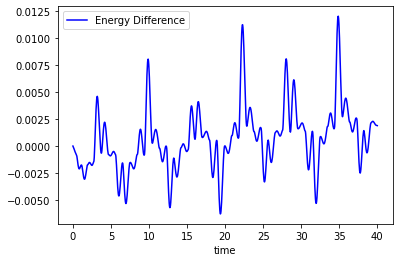

In [4]:
plt.plot(t,E-T,"b-",label="Energy Difference")

plt.xlabel('time')
plt.legend()
plt.show()  #Energy difference is within permissible limits.

### Plots

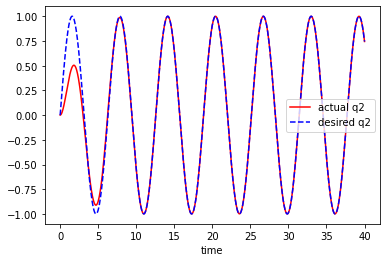

In [5]:
plt.plot(t,q2,"r-",label="actual q2")
plt.plot(t,np.sin(t),"b--",label="desired q2")

plt.xlabel('time')
plt.legend()
plt.show()

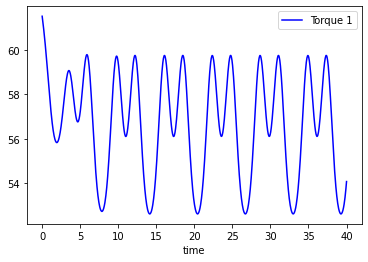

In [6]:
plt.plot(t,tau1,"b-",label="Torque 1")

plt.xlabel('time')
plt.legend()
plt.show()

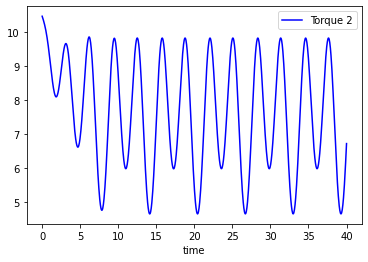

In [7]:
plt.plot(t,tau2,"b-",label="Torque 2")

plt.xlabel('time')
plt.legend()
plt.show()

### Animation

In [8]:
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter 

def get_x1y1x2y2(t, q1, q2, l1, l2):
    return (l1*np.cos(q1),
            l1*np.sin(q1),
            l1*np.cos(q1) + l2*np.cos(q1+q2),
            l1*np.sin(q1) + l2*np.sin(q1+q2))

x1, y1, x2, y2 = get_x1y1x2y2(t, sol.y[0], sol.y[2], l1, l2)

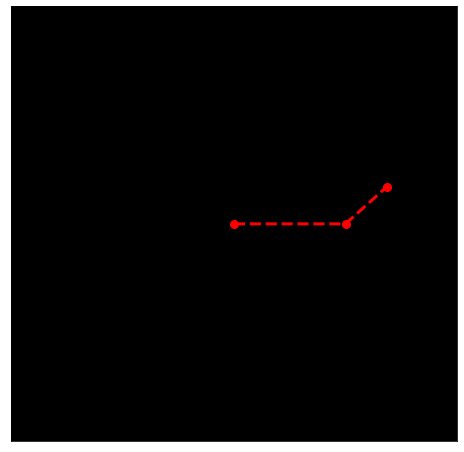

In [9]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('predefined_trajectory.gif',writer='pillow',fps=25)